In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("/kaggle/input/soil-measures-ml/soil_measures.csv")
df.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


<Axes: xlabel='N', ylabel='Count'>

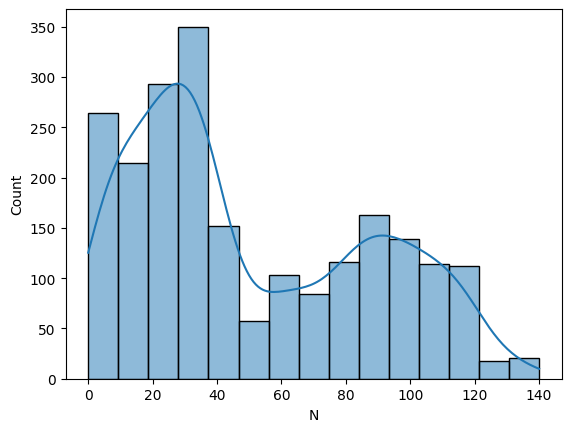

In [7]:
#Plotting distributions
import seaborn as sns
import matplotlib as plt

sns.histplot(df['N'], kde=True)

<Axes: xlabel='P', ylabel='Count'>

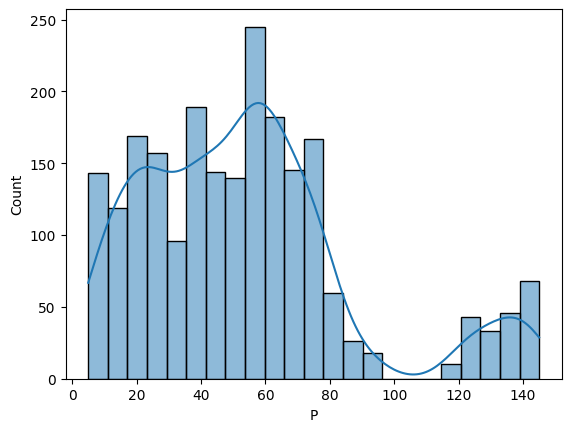

In [8]:
sns.histplot(df['P'], kde=True)

<Axes: xlabel='K', ylabel='Count'>

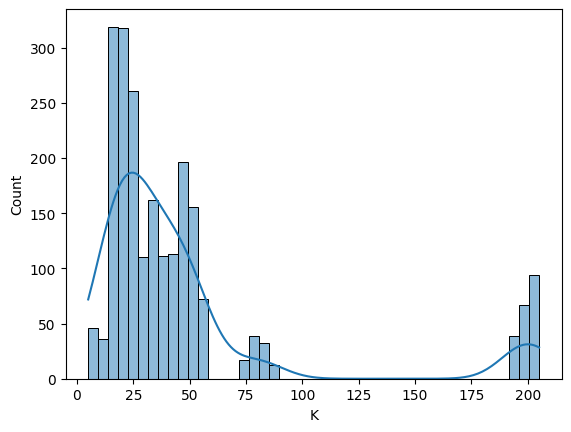

In [9]:
sns.histplot(df['K'], kde=True)

<Axes: xlabel='ph', ylabel='Count'>

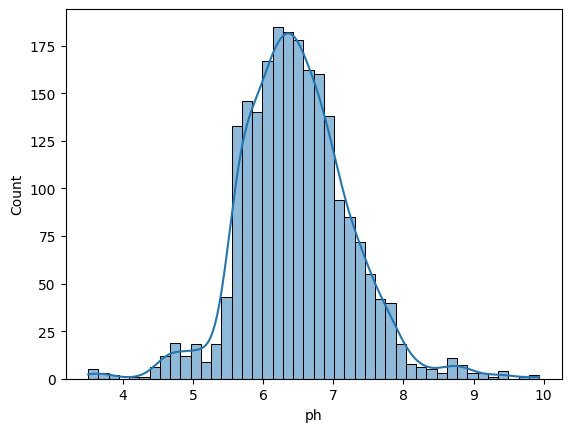

In [10]:
sns.histplot(df['ph'], kde=True)

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

X = df.drop(columns=['crop'])
y = df['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print("For ANN")
print("Train set:", X_train_scaled.shape, y_train_one_hot.shape)
print("Test set:", X_test_scaled.shape, y_test_one_hot.shape)

print("For CNN")
print("Train set:", X_train_reshaped.shape, y_train_one_hot.shape)
print("Test set:", X_test_reshaped.shape, y_test_one_hot.shape)

For ANN
Train set: (1650, 4) (1650, 22)
Test set: (550, 4) (550, 22)
For CNN
Train set: (1650, 4, 1) (1650, 22)
Test set: (550, 4, 1) (550, 22)


### ANN

In [12]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

input_shape = X_train_scaled.shape[1:]

num_classes = y_train_one_hot.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,574 (342.09 KB)

 Trainable params: 87,574 (342.09 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=128,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/128
46/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1187 - loss: 2.9117

I0000 00:00:1715823589.474268     195 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - accuracy: 0.1300 - loss: 2.8771 - val_accuracy: 0.3727 - val_loss: 1.9349
Epoch 2/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4091 - loss: 1.6092 - val_accuracy: 0.5800 - val_loss: 1.1150
Epoch 3/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5940 - loss: 1.0037 - val_accuracy: 0.6491 - val_loss: 0.9335
Epoch 4/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6761 - loss: 0.8168 - val_accuracy: 0.6909 - val_loss: 0.6897
Epoch 5/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7193 - loss: 0.6628 - val_accuracy: 0.7255 - val_loss: 0.6487
Epoch 6/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7431 - loss: 0.5786 - val_accuracy: 0.7236 - val_loss: 0.6081
Epoch 7/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7327 - loss: 0.5561 - val_accuracy: 0.6836 - val_loss: 0.6963
Epoch 8/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.5656 - val_accuracy: 0.7236 - val_loss: 0.

In [14]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_one_hot)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_one_hot)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8527 - loss: 0.2769
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7511 - loss: 0.5814 
Train Loss: 0.2752231955528259
Train Accuracy: 0.8557575941085815
Test Loss: 0.5961831212043762
Test Accuracy: 0.7454545497894287


### Adding Interactions

In [15]:
interactions = ['N*P', 'N*K', 'N*ph', 'P*K', 'P*ph', 'K*ph']
for interaction in interactions:
    feature1, feature2 = interaction.split('*')
    df[interaction] = df[feature1] * df[feature2]

df_without_crop = df.drop(columns=['crop'])
df_without_crop['crop'] = df['crop']
df = df_without_crop

df.head()

,N,P,K,ph,N*P,N*K,N*ph,P*K,P*ph,K*ph,crop
0,90,42,43,6.502985,3780,3870,585.268676,1806,273.125382,279.628368,rice
1,85,58,41,7.038096,4930,3485,598.238191,2378,408.209589,288.561951,rice
2,60,55,44,7.840207,3300,2640,470.412429,2420,431.211393,344.969114,rice
3,74,35,40,6.980401,2590,2960,516.549667,1400,244.314032,279.216036,rice
4,78,42,42,7.628473,3276,3276,595.020885,1764,320.395861,320.395861,rice


In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

X = df.drop(columns=['crop'])
y = df['crop']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)

X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

print("For ANN")
print("Train set:", X_train_scaled.shape, y_train_one_hot.shape)
print("Test set:", X_test_scaled.shape, y_test_one_hot.shape)

print("For CNN")
print("Train set:", X_train_reshaped.shape, y_train_one_hot.shape)
print("Test set:", X_test_reshaped.shape, y_test_one_hot.shape)

For ANN
Train set: (1650, 10) (1650, 22)
Test set: (550, 10) (550, 22)
For CNN
Train set: (1650, 10, 1) (1650, 22)
Test set: (550, 10, 1) (550, 22)


In [17]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

input_shape = X_train_scaled.shape[1:]

num_classes = y_train_one_hot.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,766 (342.84 KB)

 Trainable params: 87,766 (342.84 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=128,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1590 - loss: 2.8741 - val_accuracy: 0.3582 - val_loss: 2.1384
Epoch 2/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4224 - loss: 1.7897 - val_accuracy: 0.5091 - val_loss: 1.1500
Epoch 3/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6071 - loss: 0.9715 - val_accuracy: 0.6564 - val_loss: 0.8424
Epoch 4/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6779 - loss: 0.7304 - val_accuracy: 0.6818 - val_loss: 0.7365
Epoch 5/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6837 - loss: 0.6712 - val_accuracy: 0.6818 - val_loss: 0.6785
Epoch 6/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.5849 - val_accuracy: 0.7018 - val_loss: 0.6316
Epoch 7/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7095 - loss: 0.5966 - val_accuracy: 0.7145 - val_loss: 0.6423
Epoch 8/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.5150 - val_accuracy: 0.6618 - 

In [19]:
train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train_one_hot)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_one_hot)

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8704 - loss: 0.2375
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7509 - loss: 0.5973 
Train Loss: 0.2398231029510498
Train Accuracy: 0.8769696950912476
Test Loss: 0.6087684631347656
Test Accuracy: 0.7527272701263428


In [25]:
#Adding interactions helped us only to achieve very less increase in accuracy

### Using t-SNE Embedding To Train Classifier

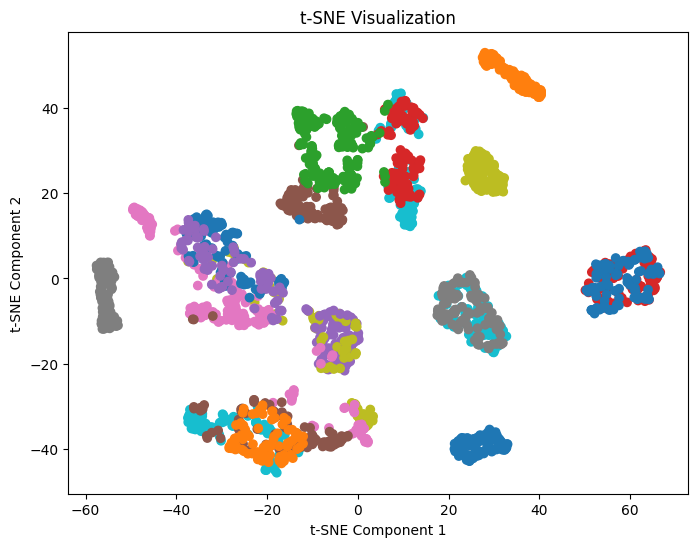

Train Accuracy: 0.8115151515151515
Test Accuracy: 0.730909090909091


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

#Defining df again as in the last section we added interactions
df = pd.read_csv("/kaggle/input/soil-measures-ml/soil_measures.csv")

X = df.drop(columns=['crop'])
y = df['crop']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

tsne = TSNE(random_state=116)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='tab10')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_encoded, test_size=0.25, random_state=116)

dt_classifier = DecisionTreeClassifier(splitter='best', min_samples_split=5,
                                       min_samples_leaf=1, max_features=None, max_depth=10,
                                       criterion='gini', random_state=116)
dt_classifier.fit(X_train, y_train)

train_acc = dt_classifier.score(X_train,y_train)
test_acc = dt_classifier.score(X_test,y_test)
print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

In [26]:
#Passing the reduced dimension to classifier did not helped much to increase the accuracy

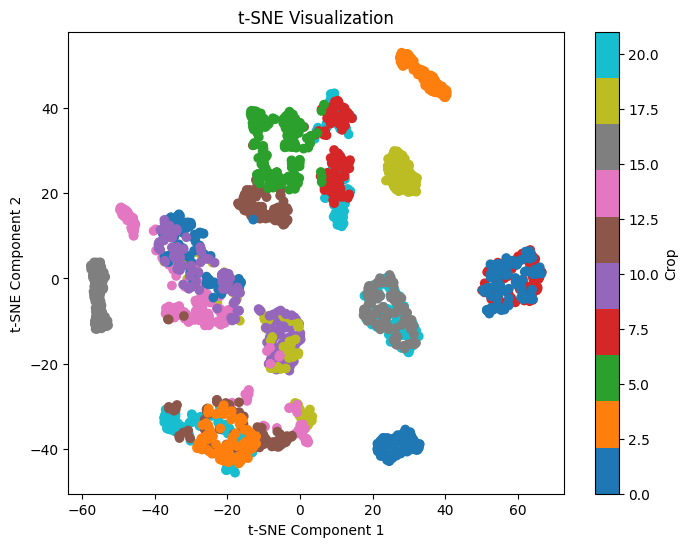

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 22)             │           726 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,510 (341.84 KB)

 Trainable params: 87,510 (341.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.2647 - loss: 2.4619 - val_accuracy: 0.4655 - val_loss: 1.3788
Epoch 2/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5023 - loss: 1.2407 - val_accuracy: 0.5255 - val_loss: 1.0944
Epoch 3/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5488 - loss: 1.1136 - val_accuracy: 0.5218 - val_loss: 1.2605
Epoch 4/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5407 - loss: 1.1050 - val_accuracy: 0.5945 - val_loss: 0.9882
Epoch 5/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5731 - loss: 0.9607 - val_accuracy: 0.5364 - val_loss: 0.9950
Epoch 6/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5802 - loss: 0.9613 - val_accuracy: 0.5727 - val_loss: 0.9438
Epoch 7/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5638 - loss: 0.9367 - val_accuracy: 0.5782 - val_loss: 0.8602
Epoch 8/128
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6059 - loss: 0.9158 - val_accuracy: 0.5800 - 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score

X = df.drop(columns=['crop'])
y = df['crop']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

y_one_hot = to_categorical(y_encoded)

tsne = TSNE(random_state=116)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE embeddings
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='tab10')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Crop')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_tsne, y_one_hot, test_size=0.25, random_state=116)

input_shape = (X_train.shape[1],)
num_classes = y_train.shape[1]

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(X_train, y_train, epochs=128, batch_size=32, validation_data=(X_test, y_test))

train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("/kaggle/input/soil-measures-ml/soil_measures.csv")

X = df.drop(columns=['crop'])
y = df['crop']

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

unique_classes = np.unique(y)
split_point = len(unique_classes) // 2

group_1_classes = unique_classes[:split_point]
group_2_classes = unique_classes[split_point:]

group_1_indices = y.isin(group_1_classes)
group_2_indices = y.isin(group_2_classes)

X_group_1 = X_scaled[group_1_indices]
y_group_1 = y[group_1_indices]

X_group_2 = X_scaled[group_2_indices]
y_group_2 = y[group_2_indices]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_group_1, y_group_1, test_size=0.25, random_state=116)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_group_2, y_group_2, test_size=0.25, random_state=116)

dt_classifier_1 = DecisionTreeClassifier(splitter='best', min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=10, criterion='gini', random_state=116)
dt_classifier_2 = DecisionTreeClassifier(splitter='best', min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=10, criterion='gini', random_state=116)

dt_classifier_1.fit(X_train_1, y_train_1)
dt_classifier_2.fit(X_train_2, y_train_2)

y_pred_1 = dt_classifier_1.predict(X_test_1)
y_pred_2 = dt_classifier_2.predict(X_test_2)

train_acc_1 = dt_classifier_1.score(X_train_1, y_train_1)
test_acc_1 = dt_classifier_1.score(X_test_1, y_test_1)
train_acc_2 = dt_classifier_2.score(X_train_2, y_train_2)
test_acc_2 = dt_classifier_2.score(X_test_2, y_test_2)

print("Classifier 1 - Train Accuracy:", train_acc_1)
print("Classifier 1 - Test Accuracy:", test_acc_1)
print("Classifier 2 - Train Accuracy:", train_acc_2)
print("Classifier 2 - Test Accuracy:", test_acc_2)

def combined_predict(X1, X2, classifier_1, classifier_2, group_1_classes):
    pred_1 = classifier_1.predict(X1)
    pred_2 = classifier_2.predict(X2)
    
    y_pred = np.concatenate([pred_1, pred_2])
    
    return y_pred

combined_test_pred = combined_predict(X_test_1, X_test_2, dt_classifier_1, dt_classifier_2, group_1_classes)

y_test = np.concatenate([y_test_1, y_test_2])
combined_test_acc = accuracy_score(y_test, combined_test_pred)

print("Combined Test Accuracy:", combined_test_acc)

Classifier 1 - Train Accuracy: 0.9587878787878787
Classifier 1 - Test Accuracy: 0.8472727272727273
Classifier 2 - Train Accuracy: 0.9660606060606061
Classifier 2 - Test Accuracy: 0.8763636363636363
Combined Test Accuracy: 0.8618181818181818


In [28]:
"""Sure, the accuracy is more but using this approach we cannot predict the crop type of a new data point as we does not know to which group does it belongs to."""

'Sure, the accuracy is more but using this approach we cannot predict the crop type of a new data point as we does not know to which group does it belongs to.'